In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import ipywidgets as widgets

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv('data/cleaned_data.csv', index_col = 0)

data.head()

Name  Lvl   HP  AC Attack_Num  \
0          AADRUSHIAN   13  275  33   Attack 1   
1  AAPOPH SERPENTFOLK    3   60  18   Attack 1   
2             AASIMAR    5   73  23   Attack 1   
3    ABANDONED ZEALOT    6   75  22   Attack 1   
4   ABBERTON RUFFIANS   -1    8  13   Attack 1   

                                        Attack_Descr Attack_Type  Hit_Bonus  \
0  Melee spiked chain +27 (disarm, reach 10 feet,...       Melee       27.0   
1  Melee scimitar +11 (forceful, sweep), Damage 1...       Melee       11.0   
2  Melee longsword +15 (versatile P), Damage 1d8+...       Melee       15.0   
3  Melee hand of despair +16 (finesse, magical), ...       Melee       16.0   
4  Melee dagger +7 (agile, thrown 10 feet, versat...       Melee        7.0   

   is_Agile  
0     False  
1     False  
2     False  
3     False  
4      True

In [3]:
four_palette = sns.color_palette(['#7b3294','#c2a5cf','#a6dba0','#008837'])
two_palette = sns.color_palette(['#c2a5cf','#a6dba0'])
two_type_palette = sns.color_palette(['#27556C', '#AA7539'])
base_color = '#7b3294'
base_type_color = '#27556C'

# Hit Bonus Histogram

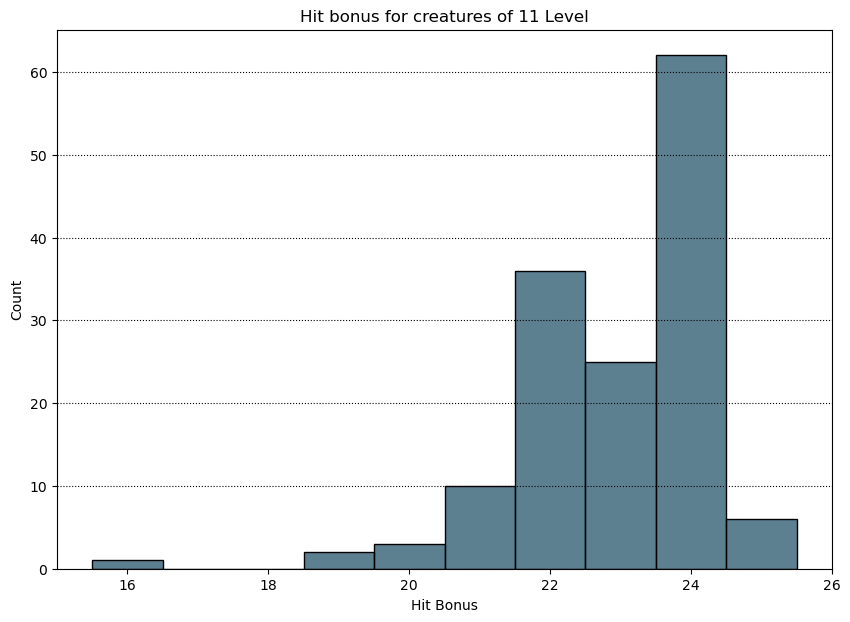

In [4]:
def plot_hit(lvl = (-1,0), stat = "count", localized = True, attack_type = 'all'):
    # filtering data
    local_data = data[data.Lvl.between(lvl[0], lvl[1])].copy()

    if attack_type == 'Melee':
        local_data = local_data[local_data['Attack_Type'] == 'Melee']
    elif attack_type == 'Range':
        local_data = local_data[local_data['Attack_Type'] == 'Range']

    # ploting
    if attack_type == 'By Type':
        sns.histplot(data = local_data, x = 'Hit_Bonus', 
                 discrete = True,
                 stat = stat, 
                 hue = 'Attack_Type',
                 palette = two_type_palette) 
    else:
        sns.histplot(data = local_data, x = 'Hit_Bonus', 
                 discrete = True,
                 stat = stat,
                 color = base_type_color)       
    

    
    plt.xlabel("Hit Bonus")
    if not localized:
        plt.xlim(data.Hit_Bonus.min(), data.Hit_Bonus.max())

    if lvl[0] == lvl[1]:
        title = f"Hit bonus for creatures of {lvl[0]} Level"
    else:
        title = f"Hit bonus for creatures of {lvl[0]} - {lvl[1]} Levels"
    plt.title(title)

    lims = plt.ylim()
    if stat == 'count':
        grid_step = 10
    elif stat == 'probability':
        grid_step = .05
    elif stat == 'percent':
        grid_step = 5
    plt.yticks(np.arange(0, lims[1], grid_step))
    plt.grid(True, axis = 'y', linestyle = ':', color = 'k')
plot_hit((11, 11))

In [5]:
_ = interact(plot_hit,
             lvl = widgets.IntRangeSlider(
                    value = [-1 , 0],
                    min = data.Lvl.min(),
                    max = data.Lvl.max(),
                    description = "Creatures' Level"
             ),
             stat = widgets.ToggleButtons(
                     options = ["count", "probability", "percent"],
                     description = "Normalization",
                     disabled = False),
              localized = widgets.Checkbox(
                  value= True,
                  description = "Localized",
              ),
              attack_type = widgets.ToggleButtons(
                     options = ["All", "Melee", "Range", "By Type"],
                     description = "Attack Type",

              )
)

interactive(children=(IntRangeSlider(value=(-1, 0), description="Creatures' Level", max=25, min=-1), ToggleBut…

- [x] Add option to plot range and Melee as two histograms

# Player Charecter AC vs Creatures Hit Bonus comparasion

<Axes: xlabel='Lvl', ylabel='Hit_Bonus'>

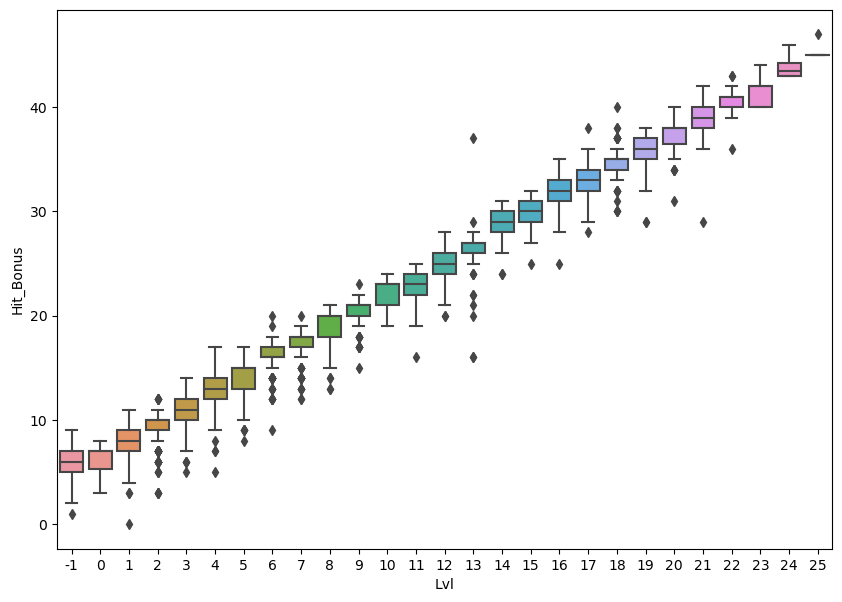

In [6]:
sns.boxplot(data = data, x = 'Lvl', y = 'Hit_Bonus')

In [7]:
mean_hit = data.groupby('Lvl')['Hit_Bonus'].mean()
mean_hit
median_hit = data.groupby('Lvl')['Hit_Bonus'].median()
median_hit

Lvl
-1      6.0
 0      7.0
 1      8.0
 2     10.0
 3     11.0
 4     13.0
 5     15.0
 6     16.0
 7     18.0
 8     20.0
 9     21.0
 10    23.0
 11    23.0
 12    25.0
 13    27.0
 14    29.0
 15    30.0
 16    32.0
 17    33.0
 18    35.0
 19    36.0
 20    38.0
 21    39.0
 22    41.0
 23    42.0
 24    43.5
 25    45.0
Name: Hit_Bonus, dtype: float64

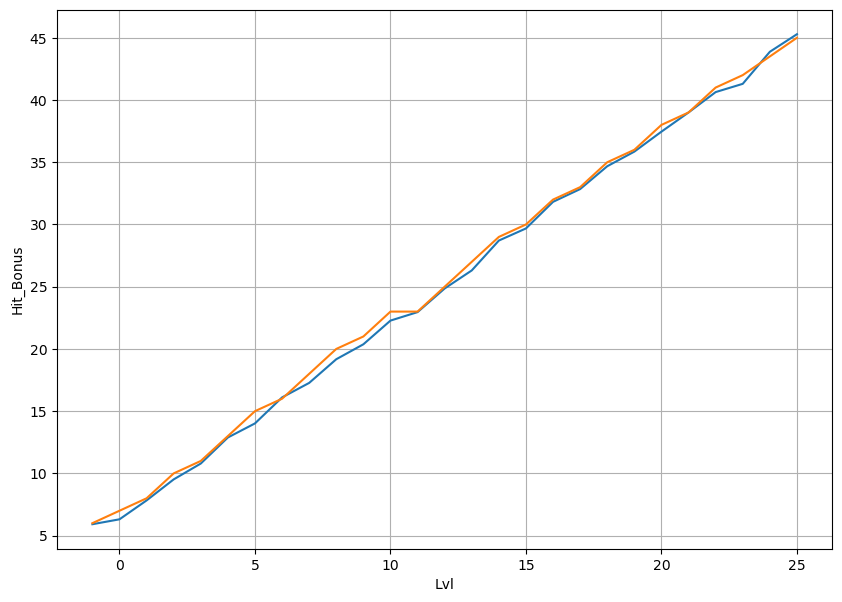

In [8]:
sns.lineplot(mean_hit, markers=True, dashes=True)
sns.lineplot(median_hit, markers=True, dashes=True)
plt.grid(True)

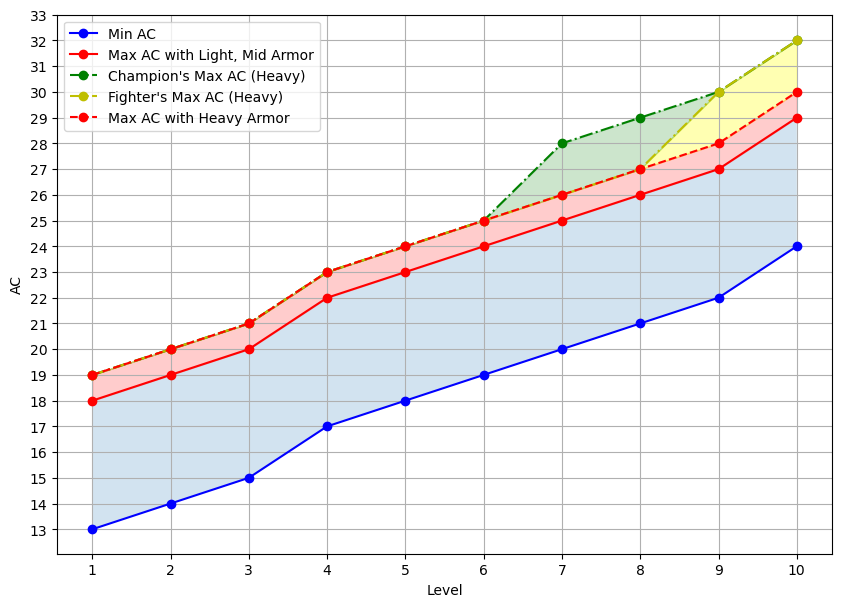

In [9]:
lvls = np.arange(1, 11)
trained = 2 + lvls
expert = 4 + lvls
rune = np.array([0, 0, 0, 1, 1, 1, 1, 1 ,1 ,2])

min_ac = 10 + trained + rune
max_mid_ac = 10 + 5 + trained + rune
max_heavy_ac = 10 + 6 + trained + rune

max_champ_ac = 10 + 6 + np.concatenate((trained[:6], expert[6:]), axis = None) + rune
max_fighter_ac = 10 + 6 + np.concatenate((trained[:8], expert[8:]), axis = None) + rune
max_champ_shild_ac = max_champ_ac + 2
max_monk_ac = 10 + 4 + expert

plt.plot(lvls, min_ac, 'bo-', label = "Min AC")
#plt.plot(lvls, max_monk_ac, 'k--o', label = "Max Monk AC")
plt.fill_between(lvls, min_ac, max_mid_ac, alpha = .2)
plt.plot(lvls, max_mid_ac, 'ro-', label = "Max AC with Light, Mid Armor")
plt.fill_between(lvls, max_mid_ac, max_heavy_ac, alpha = .2, color = "red")
plt.fill_between(lvls, max_heavy_ac, max_fighter_ac, alpha = .3, color = "yellow")
plt.plot(lvls, max_champ_ac, 'go-.', label = "Champion's Max AC (Heavy)")
plt.fill_between(lvls, max_fighter_ac, max_champ_ac, alpha = .2, color = "green")
# plt.plot(lvls, max_champ_shild_ac, 'g:', linewidth = 3, label = "Champion's Max AC (Heavy+Shield)")
plt.plot(lvls, max_fighter_ac, 'yo-.' , label = "Fighter's Max AC (Heavy)")
plt.plot(lvls, max_heavy_ac, 'ro--', label = "Max AC with Heavy Armor")


plt.xticks(lvls)
plt.yticks(np.arange(13, 34))
plt.grid(True)
plt.xlabel("Level")
plt.ylabel("AC")

plt.legend()

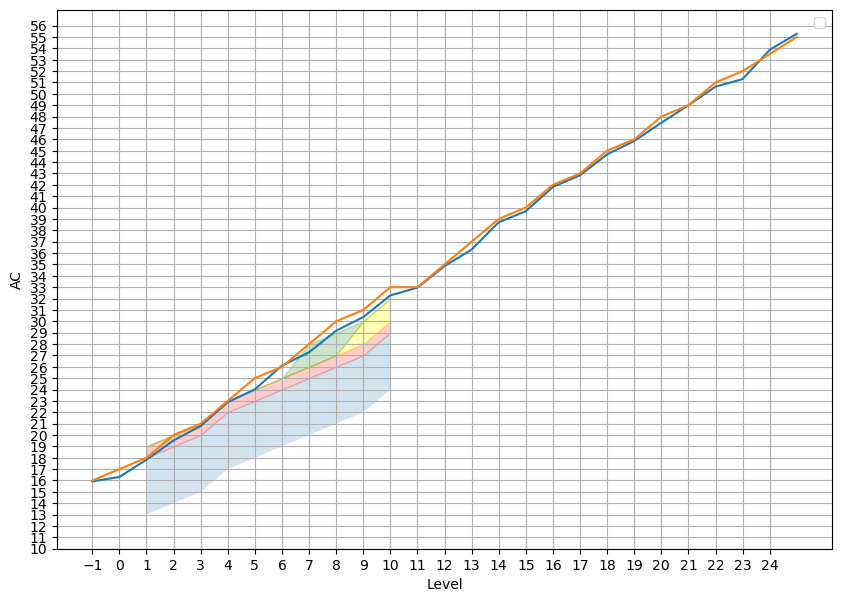

In [10]:
plt.fill_between(lvls, min_ac, max_mid_ac, alpha = .2)
plt.fill_between(lvls, max_mid_ac, max_heavy_ac, alpha = .2, color = "red")
plt.fill_between(lvls, max_heavy_ac, max_fighter_ac, alpha = .3, color = "yellow")
plt.fill_between(lvls, max_fighter_ac, max_champ_ac, alpha = .2, color = "green")

# plt.plot(x = mean_hit.Lvl)

sns.lineplot(mean_hit+10, markers=True, dashes=True)
sns.lineplot(median_hit+10, markers=True, dashes=True)

plt.xticks(np.arange(data.Lvl.min(), data.Lvl.max()))
plt.yticks(np.arange(data.Hit_Bonus.min(), data.Hit_Bonus.max())+10)
plt.grid(True)
plt.xlabel("Level")
plt.ylabel("AC")

plt.legend()

# Chanse of being hit

In [11]:
def hit_chanses(hb, ac):
    # local_data = data[data.Lvl.between(lvls[0], lvls[1])]
    ch = {
        'cf': 0,
        'f': 0,
        's': 0,
        'cs': 0
    }

    roll = np.arange(2, 20)

    # Special cases for 1 and 20 roll

    # For 1
    if hb+1 < ac:
        ch['cf'] += 5
    elif hb+1 <= ac+10:
        ch['f'] += 5
    else:
        ch['s'] += 5

    # For 20
    if hb+20 < ac-10:
        ch['f'] += 5
    elif hb+20 <= ac:
        ch['s'] += 5
    else:
        ch['cs'] += 5


    # Cases for 2-19
    for r in roll+hb:
        if r < ac-10:
            ch['cf'] += 5
        elif r < ac:
            ch['f'] += 5
        elif r < ac+10:
            ch['s'] += 5
        else:
            ch['cs'] += 5
    
    return np.array([ch['cf'], ch['f'], ch['s'], ch['cs']])/100
        
hit_chanses(20, 20)

array([0.  , 0.05, 0.4 , 0.55])

In [12]:
hit_df = data
ac_pc = 20

# hit_df['Hit_Bonus'].apply(lambda x: hit_chanses(x, ac_pc))
hit_df[['cf_chanse', 'f_chanse', 's_chanse', 'cs_chanse']] = hit_df['Hit_Bonus'].apply(lambda x: pd.Series(hit_chanses(x, ac_pc)))
# hit_df

In [13]:
# def hit_chanse_plot_dec(has_by_type, title_str)
#     def decorator(func):
#         def inner(*args, **kwargs):
#             result = func()


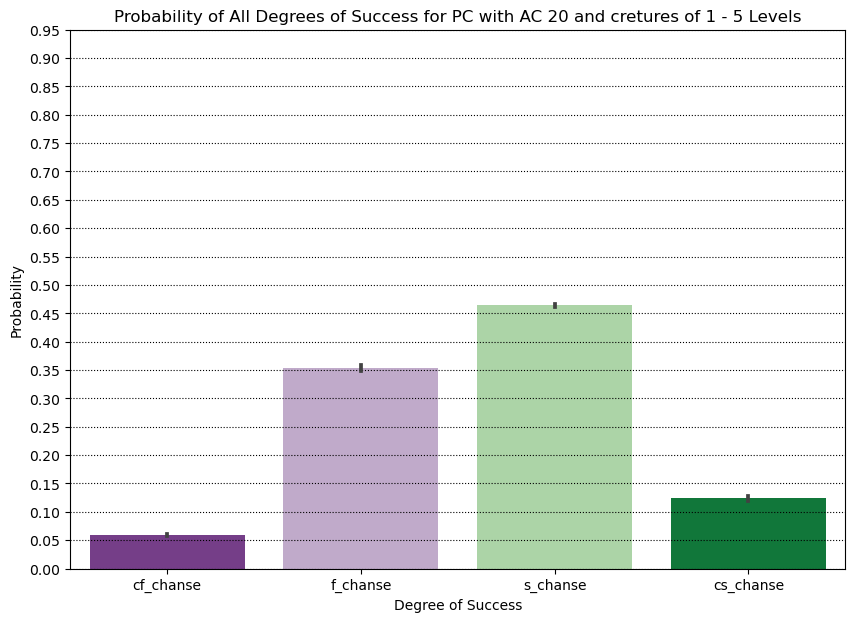

In [14]:
def plot_hit_chanses(ac, lvls, attack_type):
    # calculate and filtrate the data
    local_df = data[data['Lvl'].between(lvls[0], lvls[1])].copy()
    local_df[['cf_chanse', 'f_chanse', 's_chanse', 'cs_chanse']] = local_df['Hit_Bonus'].apply( lambda x: pd.Series(hit_chanses(x, ac)))

    if attack_type == 'Melee':
        local_df = local_df[local_df['Attack_Type'] == 'Melee']
    elif attack_type == 'Range':
        local_df = local_df[local_df['Attack_Type'] == 'Range']

    # rearanging
    local_df = local_df.melt(
        id_vars = ['Name', 'Lvl', 'Hit_Bonus', 'Attack_Type'], 
        value_vars=['cf_chanse', 'f_chanse', 's_chanse', 'cs_chanse'], 
        var_name= 'Hit_Type', 
        value_name='Probability'
    )



    # ploting
    if attack_type in ['All', 'Melee', 'Range']:
        sns.barplot(local_df, x = 'Hit_Type', y = 'Probability', palette=four_palette)
    elif attack_type == 'By Type':
        sns.barplot(local_df, x = 'Hit_Type', y = 'Probability', hue = 'Attack_Type', palette=two_palette)


    plt.xlabel('Degree of Success')
    if lvls[0] == lvls[1]:
        plt.title(f'Probability of All Degrees of Success for PC with AC {ac} and cretures of {lvls[0]} Level')
    else:
        plt.title(f'Probability of All Degrees of Success for PC with AC {ac} and cretures of {lvls[0]} - {lvls[1]} Levels')

    plt.yticks(np.arange(0, 1, .05))

    plt.grid(True, axis = 'y', linestyle = ':', color = 'k')

plot_hit_chanses(20, (1, 5), 'All')

In [15]:
_ = widgets.interact(
    plot_hit_chanses,
    ac = widgets.IntSlider(
        value = 20,
        min = 8,
        max = 40,
        step = 1
    ),
    lvls = widgets.IntRangeSlider(
        value = [-1, 0],
        min = data.Lvl.min(),
        max = data.Lvl.max()
    ),
    attack_type = widgets.ToggleButtons(
        options = ['All', 'Melee', 'Range', 'By Type'],
        description = "Attack Type",
    )
)
# ac, lvls, attack_type

interactive(children=(IntSlider(value=20, description='ac', max=40, min=8), IntRangeSlider(value=(-1, 0), desc…

# Hit chanse to hit a creature

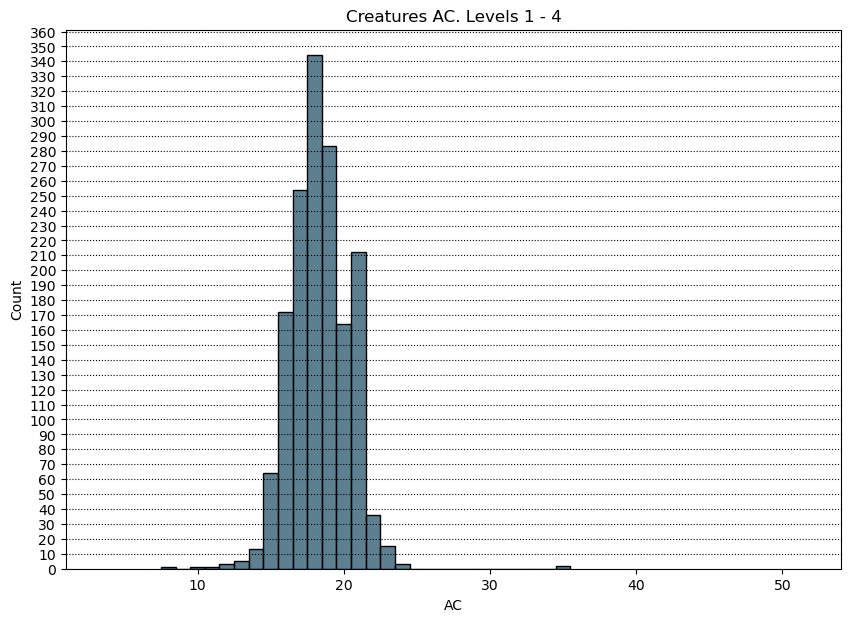

In [16]:
def plot_cretures_ac(lvls, stat = 'count', localized = False):
    # filtering data
    local_df = data.copy()
    local_df = local_df[local_df.Lvl.between(lvls[0], lvls[1])]

    # ploting
    sns.histplot(data = local_df, x = 'AC', stat = stat, discrete=True, color = base_type_color)

    if lvls[0] == lvls[1]:
        plt.title(f'Creatures AC. Level {lvls[0]}')
    else:
        plt.title(f'Creatures AC. Levels {lvls[0]} - {lvls[1]}')

    if not localized:
        plt.xlim([data.AC.min(), data.AC.max()])

    lims = plt.ylim()
    if stat == 'count':
        grid_step = 10
    elif stat == 'probability':
        grid_step = .05
    elif stat == 'percent':
        grid_step = 5
    plt.yticks(np.arange(0, lims[1], grid_step))
    plt.grid(True, axis = 'y', linestyle = ':', color = 'k')


plot_cretures_ac([1, 4])

In [17]:
_ = interact(plot_cretures_ac,
             lvls = widgets.IntRangeSlider(
                    value = [-1 , 0],
                    min = data.Lvl.min(),
                    max = data.Lvl.max(),
                    description = "Creatures' Level"
             ),
             stat = widgets.ToggleButtons(
                     options = ["count", "probability", "percent"],
                     description = "Normalization",
                     disabled = False),
              localized = widgets.Checkbox(
                  value= True,
                  description = "Localized",
              )
)

interactive(children=(IntRangeSlider(value=(-1, 0), description="Creatures' Level", max=25, min=-1), ToggleBut…

# Chanse to hit a creature

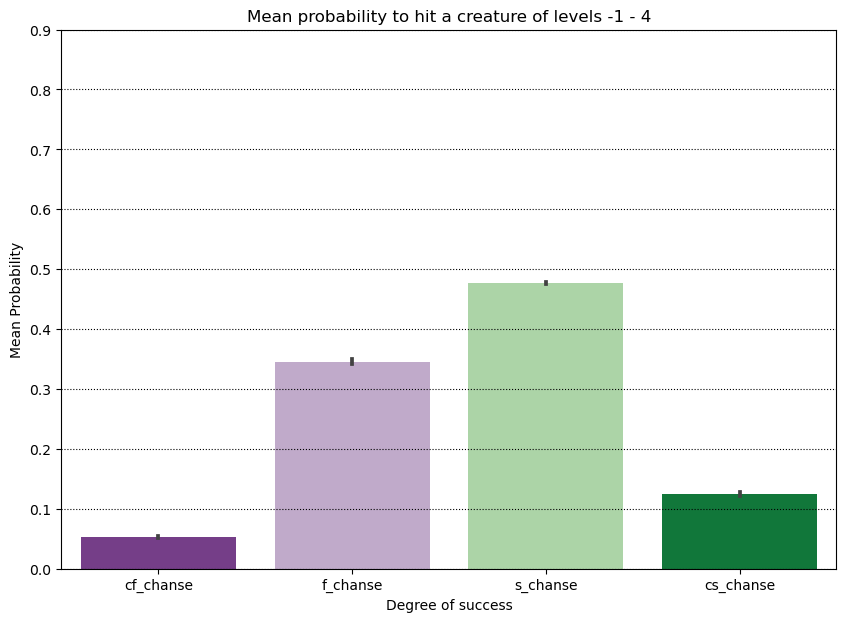

In [18]:
def plot_chanse_to_hit(hb, lvls):
    # filtering data
    local_df = data.copy()
    local_df = local_df[local_df.Lvl.between(lvls[0], lvls[1])]

    # calcualting
    local_df[['cf_chanse', 'f_chanse', 's_chanse', 'cs_chanse']] = local_df['AC'].apply( lambda x: pd.Series(hit_chanses(hb, x)))

    # rearanging
    local_df = local_df.melt(
        id_vars = ['Name', 'Lvl', 'Hit_Bonus', 'Attack_Type'], 
        value_vars=['cf_chanse', 'f_chanse', 's_chanse', 'cs_chanse'], 
        var_name= 'Hit_Type', 
        value_name='Probability'
    )

    # ploting
    sns.barplot(
        data = local_df,
        x = 'Hit_Type',
        y = 'Probability', 
        palette=four_palette
    )

    if lvls[0] == lvls[1]:
        plt.title(f'Mean probability to hit a creature of level {lvls[0]}')
    else:
        plt.title(f'Mean probability to hit a creature of levels {lvls[0]} - {lvls[1]}')

    plt.xlabel('Degree of success')
    plt.ylabel('Mean Probability')

    plt.yticks(np.arange(0, 1, .1))
    plt.grid(True, axis='y', linestyle = ':', color = 'k')

plot_chanse_to_hit(9, [-1, 4])


In [19]:
_ = widgets.interact(
    plot_chanse_to_hit,
    hb = widgets.IntSlider(
        value = 10,
        min = -1,
        max = 30
    ),
    lvls = widgets.IntRangeSlider(
        value = [-1, 0],
        min = data.Lvl.min(),
        max = data.Lvl.max(),
        description = 'Creatures Levels'
    )
)

interactive(children=(IntSlider(value=10, description='hb', max=30, min=-1), IntRangeSlider(value=(-1, 0), des…

# Damage Analysis
## Damage reading


In [20]:
import re 

def read_attack_damage(s):
    if not s:
        return None
    
    # Seperate string to deal only with damage
    _, _, s = s.partition(', Damage ')

    damage_strings = list(re.finditer('\d+d\d+((\+|\-)\d+)?', s))

    if not damage_strings:
        return [None, None]
    
    # flat_damage_strings = list(
    #     re.finditer(
    #         ' \d+ (bludgeoning|piercing|slashing|acid|cold|electricity|fire|sonic|positive|negative|force|chaotic|evil|good|lawful|mental|poison|bleed|precision)'
    #     )                       
    # )
    
    mean_damage = 0
    var_damage = 0
    for dice_str in damage_strings:
        m, v = read_dice_str(dice_str.group())
        mean_damage += m
        var_damage += v

    return [mean_damage, var_damage]


def read_dice_str(s):
    '''
    Read dice string. Example '3d6+4'. 
    Returns Mean and Variance
    '''

    # Read number of dice
    n_dice = re.match(r'\d+', s)
    if not n_dice:
        return None
    n_dice = int(n_dice.group())
    # Read type of dice (d4, d6, d8, etc.)
    dice_type = re.search(r'd\d+', s)
    if not dice_type:
        return None
    dice_type = int(dice_type.group()[1:])
    # Read bonus, if the is. 
    bonus = re.search(r'(-|\+)\d+', s)
    if not bonus:
        bonus = 0
    else:
        bonus = int(bonus.group())

    # Calculate Mean and Varinace
    mean = n_dice * (dice_type + 1)/2 + bonus
    var = n_dice * (dice_type**2 - 1)/12
    return (mean, var)


attack_st = data['Attack_Descr'][205]
print(f'Original string: \n{attack_st}')
dice_st = read_attack_damage(attack_st)
print(f'Mean and Varience dice strings: \n{dice_st}')


Original string: 
Melee beak +13 (finesse, magical), Damage 1d-2 piercing plus calcification
Mean and Varience dice strings: 
[None, None]


In [21]:
new_df = data.copy()
new_df[['Mean_Damage', 'Damage_Variance']] = pd.DataFrame(new_df['Attack_Descr'].apply(read_attack_damage).to_list())
# new_df[['Mean_Damage', 'Damage_Variance']] = new_df['Attack_Descr'].apply(pd.Series(read_attack_damage))

<Axes: xlabel='Lvl', ylabel='Mean_Damage'>

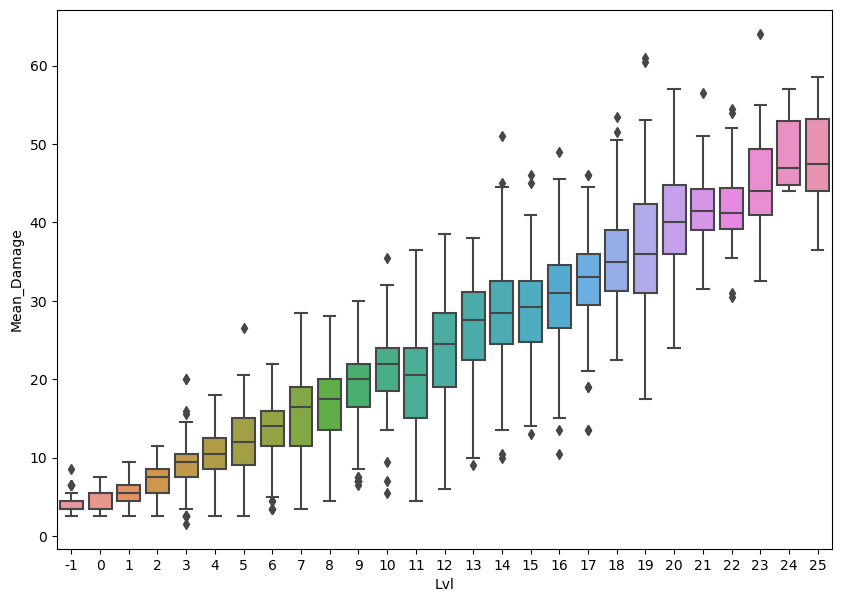

In [22]:
# import hvplot.pandas
sns.boxplot(data = new_df, x = 'Lvl', y = 'Mean_Damage')
# new_df.hvplot.box(by = 'Lvl', y = 'Damage_Variance')

# Analise Attack Damage

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4462 entries, 0 to 4461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4462 non-null   object 
 1   Lvl              4462 non-null   int64  
 2   HP               4462 non-null   int64  
 3   AC               4462 non-null   int64  
 4   Attack_Num       4462 non-null   object 
 5   Attack_Descr     4462 non-null   object 
 6   Attack_Type      4462 non-null   object 
 7   Hit_Bonus        4462 non-null   float64
 8   is_Agile         4462 non-null   bool   
 9   cf_chanse        4462 non-null   float64
 10  f_chanse         4462 non-null   float64
 11  s_chanse         4462 non-null   float64
 12  cs_chanse        4462 non-null   float64
 13  Mean_Damage      4383 non-null   float64
 14  Damage_Variance  4383 non-null   float64
dtypes: bool(1), float64(7), int64(3), object(4)
memory usage: 656.3+ KB


There are missing data. Few creatures has attack like 1d-2

In [24]:
new_df = new_df.dropna(subset='Mean_Damage')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 0 to 4461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4383 non-null   object 
 1   Lvl              4383 non-null   int64  
 2   HP               4383 non-null   int64  
 3   AC               4383 non-null   int64  
 4   Attack_Num       4383 non-null   object 
 5   Attack_Descr     4383 non-null   object 
 6   Attack_Type      4383 non-null   object 
 7   Hit_Bonus        4383 non-null   float64
 8   is_Agile         4383 non-null   bool   
 9   cf_chanse        4383 non-null   float64
 10  f_chanse         4383 non-null   float64
 11  s_chanse         4383 non-null   float64
 12  cs_chanse        4383 non-null   float64
 13  Mean_Damage      4383 non-null   float64
 14  Damage_Variance  4383 non-null   float64
dtypes: bool(1), float64(7), int64(3), object(4)
memory usage: 517.9+ KB


<Axes: xlabel='Lvl', ylabel='Mean_Damage'>

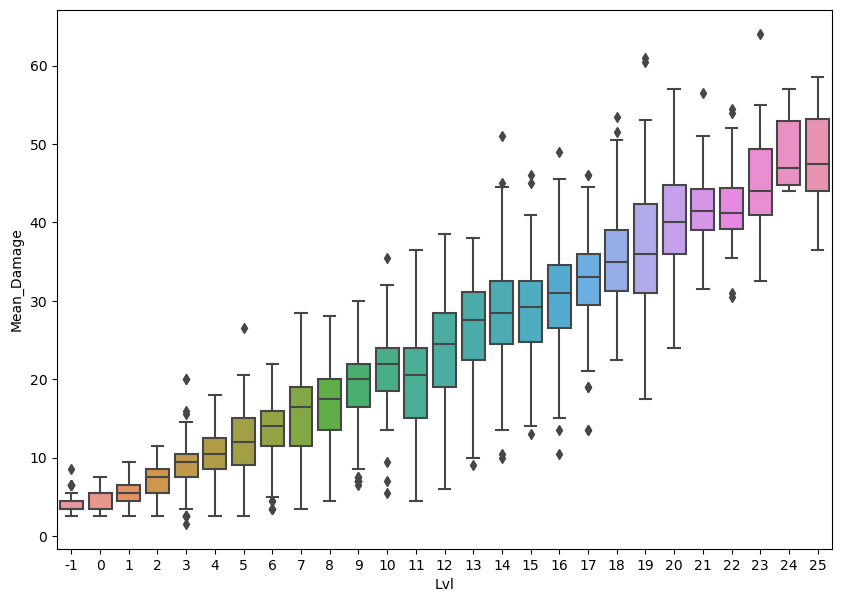

In [25]:
sns.boxplot(data = new_df, x = 'Lvl', y = 'Mean_Damage')
# new_df.hvplot.box(by = 'Lvl', y = 'Damage_Variance')

In [26]:
# new_df[new_df.Lvl == 3].Mean_Damage.max() # 20
# new_df[(new_df.Lvl == 3) & (new_df.Mean_Damage == 20)]

def print_min_max_damage_rows(lvl):
    max_damage = new_df[new_df.Lvl == lvl].Mean_Damage.max()
    min_damage = new_df[new_df.Lvl == lvl].Mean_Damage.min()

    print('Max Damage')
    print(new_df[(new_df.Lvl == lvl) & (new_df.Mean_Damage == max_damage)])
    print('\n -------------------------------------------------------------- \n')
    print('Min Damage')
    print(new_df[(new_df.Lvl == lvl) & (new_df.Mean_Damage == min_damage)])

print_min_max_damage_rows(16)

Max Damage
                    Name  Lvl   HP  AC Attack_Num  \
77  ANCIENT BRASS DRAGON   16  325  39   Attack 1   

                                         Attack_Descr Attack_Type  Hit_Bonus  \
77  Melee jaws +32 (fire, magical, reach 15 feet),...       Melee       32.0   

    is_Agile  cf_chanse  f_chanse  s_chanse  cs_chanse  Mean_Damage  \
77     False        0.0       0.0      0.05       0.95         49.0   

    Damage_Variance  
77        39.333333  

 -------------------------------------------------------------- 

Min Damage
           Name  Lvl   HP  AC Attack_Num  \
3201  QORMINTUR   16  295  39   Attack 2   

                                           Attack_Descr Attack_Type  \
3201  Ranged acid flask +32 (range increment 60 feet...       Range   

      Hit_Bonus  is_Agile  cf_chanse  f_chanse  s_chanse  cs_chanse  \
3201       32.0     False        0.0       0.0      0.05       0.95   

      Mean_Damage  Damage_Variance  
3201         10.5             8.75  


- [x] There are deadly weapons that have a die, for example deadly 1d8. 
But we need only the part after 'Damage' so we will fix it by seperating the string on Damage. DONE

- [x] There is the second problem. Some attacks have persistant, splash, or just not random (constant) damage. Example is Qormintur who has several such attacks. 'Damage **7 acid damage** plus **3d6 persistent acid damage** and **9 acid splash damage**', 'Damage **3d8+6 fire** plus **3 persistent fire** and **9 fire splash**'.
There are two solutions that i see. The easy one is that we just search for any number withou d and it is flat damage. The hard one (if the easy one will not work), is that search for number and word for type of damage (or persistant) after that number

Let's check for lines with ' \d+ '

In [27]:
def has_a_number(s):
    _, _, s = s.partition(', Damage ')
    out = bool(re.search(' \d ', s))
    return out

# has_a_number('')

new_df[new_df.Attack_Descr.apply(has_a_number)]

Name  Lvl   HP  AC Attack_Num  \
395                      CINDER WOLF    1   24  15   Attack 1   
495   DESICCATED GIANT CRAWLING HAND    3   45  19   Attack 1   
506                 DIRE CINDER WOLF    3   50  18   Attack 1   
526                             DORU    1   20  16   Attack 1   
648       FARMER DRYSTAN'S SCARECROW    1   32  16   Attack 1   
...                              ...  ...  ...  ..        ...   
4355                       QUOPPOPAK   11  195  31   Attack 4   
4396                       WATER YAI   17  295  40   Attack 4   
4406                  XULGATH BOMBER    7  115  25   Attack 4   
4455                  XULGATH BOMBER    7  115  25   Attack 5   
4456             XULGATH HERD-TENDER    8  135  27   Attack 5   

                                           Attack_Descr Attack_Type  \
395   Melee jaws +9, Damage 1d6+3 piercing plus 1 fi...       Melee   
495   Melee claw +12, Damage 1d6 + 7 slashing plus Grab       Melee   
506   Melee jaws +12 (reach 10 feet), Damage 1d10+5 ...       Melee   
526   Melee bite +9 (agile, evil, finesse, magic, po...       Melee   
648   Melee claw +9 (agile, finesse, reach 10 feet, ...       Melee   
...                                                 ...         ...   
4355  Ranged water jet +23 (range 100 feet, water), ...       Range   
4396  Ranged electric missile +30 (electricity, evil...       Range   
4406  Ranged acid flask +17 (range increment 20 feet...       Range   
4455  Ranged alchemistes fire +17 (range increment 2...       Range   
4456  Ranged moderate alchemistes fire +20 (range in...       Range   

      Hit_Bonus  is_Agile  cf_chanse  f_chanse  s_chanse  cs_chanse  \
395         9.0     False       0.05      0.45      0.45       0.05   
495        12.0     False       0.05      0.30      0.50       0.15   
506        12.0     False       0.05      0.30      0.50       0.15   
526         9.0      True       0.05      0.45      0.45       0.05   
648         9.0      True       0.05      0.45      0.45       0.05   
...         ...       ...        ...       ...       ...        ...   
4355       23.0     False       0.00      0.05      0.25       0.70   
4396       30.0     False       0.00      0.00      0.05       0.95   
4406       17.0     False       0.05      0.05      0.50       0.40   
4455       17.0     False       0.05      0.05      0.50       0.40   
4456       20.0     False       0.00      0.05      0.40       0.55   

      Mean_Damage  Damage_Variance  
395           6.5         2.916667  
495           3.5         2.916667  
506          10.5         8.250000  
526           3.5         2.916667  
648           6.5         2.916667  
...           ...              ...  
4355         20.0         5.833333  
4396         31.5        35.750000  
4406          9.0         5.833333  
4455         11.0        10.500000  
4456          9.0        10.500000  

[86 rows x 15 columns]

words after number for damage: [types of damage, 'splash', 'persistant']


'bludgeoning', 'piercing', 'slashing', 'acid', 'cold', 'electricity', 'fire', 'sonic', 'positive', 'negative', 'force', 'chaotic', 'evil', 'good', 'lawful', 'mental', 'poison', 'bleed', 'precision'

In [28]:
def has_flat_damage(s):
    _, _, s = s.partition(', Damage')
    return bool(re.search(' \d+ (bludgeoning|piercing|slashing|acid|cold|electricity|fire|sonic|positive|negative|force|chaotic|evil|good|lawful|mental|poison|bleed|precision|persistent|splash)', s))

new_df[new_df.Attack_Descr.apply(has_flat_damage)]

Name  Lvl   HP  AC Attack_Num  \
395                      CINDER WOLF    1   24  15   Attack 1   
495   DESICCATED GIANT CRAWLING HAND    3   45  19   Attack 1   
506                 DIRE CINDER WOLF    3   50  18   Attack 1   
526                             DORU    1   20  16   Attack 1   
648       FARMER DRYSTAN'S SCARECROW    1   32  16   Attack 1   
...                              ...  ...  ...  ..        ...   
4277        BIJAN AND ZAYNAP OHRLAVI    5   75  22   Attack 4   
4321                          JAFAKI    8  100  26   Attack 4   
4406                  XULGATH BOMBER    7  115  25   Attack 4   
4455                  XULGATH BOMBER    7  115  25   Attack 5   
4456             XULGATH HERD-TENDER    8  135  27   Attack 5   

                                           Attack_Descr Attack_Type  \
395   Melee jaws +9, Damage 1d6+3 piercing plus 1 fi...       Melee   
495   Melee claw +12, Damage 1d6 + 7 slashing plus Grab       Melee   
506   Melee jaws +12 (reach 10 feet), Damage 1d10+5 ...       Melee   
526   Melee bite +9 (agile, evil, finesse, magic, po...       Melee   
648   Melee claw +9 (agile, finesse, reach 10 feet, ...       Melee   
...                                                 ...         ...   
4277  Ranged moderate frost vial +16 (range incremen...       Range   
4321  Ranged bottled lightning +19 (bomb, range incr...       Range   
4406  Ranged acid flask +17 (range increment 20 feet...       Range   
4455  Ranged alchemistes fire +17 (range increment 2...       Range   
4456  Ranged moderate alchemistes fire +20 (range in...       Range   

      Hit_Bonus  is_Agile  cf_chanse  f_chanse  s_chanse  cs_chanse  \
395         9.0     False       0.05      0.45      0.45       0.05   
495        12.0     False       0.05      0.30      0.50       0.15   
506        12.0     False       0.05      0.30      0.50       0.15   
526         9.0      True       0.05      0.45      0.45       0.05   
648         9.0      True       0.05      0.45      0.45       0.05   
...         ...       ...        ...       ...       ...        ...   
4277       16.0     False       0.05      0.10      0.50       0.35   
4321       19.0     False       0.00      0.05      0.45       0.50   
4406       17.0     False       0.05      0.05      0.50       0.40   
4455       17.0     False       0.05      0.05      0.50       0.40   
4456       20.0     False       0.00      0.05      0.40       0.55   

      Mean_Damage  Damage_Variance  
395           6.5         2.916667  
495           3.5         2.916667  
506          10.5         8.250000  
526           3.5         2.916667  
648           6.5         2.916667  
...           ...              ...  
4277          7.0         5.833333  
4321          9.0         5.833333  
4406          9.0         5.833333  
4455         11.0        10.500000  
4456          9.0        10.500000  

[66 rows x 15 columns]

In [29]:
new_df[new_df.Attack_Descr.apply(has_a_number) & ~new_df.Attack_Descr.apply(has_flat_damage)]

Name  Lvl   HP  AC Attack_Num  \
1131               LEDALUSCA    2   40  17   Attack 1   
1173      LIVING THUNDERCLAP    4   50  22   Attack 1   
1174        LIVING WATERFALL    5   90  20   Attack 1   
1175        LIVING WHIRLWIND    5   50  24   Attack 1   
1306             MUMMY BRUTE    2   60  15   Attack 1   
1811              STORM LORD    9  120  30   Attack 1   
1846          TECHNIC ZOMBIE    1   45  12   Attack 1   
1847          TECHNIC ZOMBIE    3   70  16   Attack 1   
2120       YELLOW MUSK BRUTE    2   45  15   Attack 1   
2171            ZOMBIE BRUTE    2   70  15   Attack 1   
2241                   AMMUT   18  350  41   Attack 2   
2533            DESERT DRAKE    8  135  27   Attack 2   
2620                EXCORION    7  160  24   Attack 2   
2621        EXCORION PARAGON   18  300  41   Attack 2   
2848                   INOHR   12  215  33   Attack 2   
2884            KALYN POUNCH   12  215  33   Attack 2   
2969            LIVING MURAL   19  100  43   Attack 2   
3077               NEFRETHUT   18  350  41   Attack 2   
3188  PRIEST OF BLACKFINGERS   12  215  33   Attack 2   
3484           URBECK MUNSHO   12  215  33   Attack 2   
4355               QUOPPOPAK   11  195  31   Attack 4   
4396               WATER YAI   17  295  40   Attack 4   

                                           Attack_Descr Attack_Type  \
1131  Melee wave +10, Damage 1d6+4 bludgeoning plus ...       Melee   
1173  Melee gust +14 (agile, finesse), Damage 2d6+6 ...       Melee   
1174  Melee wave +15 (reach 10 feet), Damage 2d8+7 b...       Melee   
1175  Melee gust +14 (finesse, reach 10 feet), Damag...       Melee   
1306  Melee fist +11 (reach 10 feet), Damage 1d12+5 ...       Melee   
1811  Melee gust +20 (finesse, reach 15 feet), Damag...       Melee   
1846  Melee fist +8 (reach 10 feet), Damage 1d10+4 b...       Melee   
1847  Melee fist +12 (reach 10 feet), Damage 1d10+4 ...       Melee   
2120  Melee fist +11 (reach 10 feet), Damage 1d12+5 ...       Melee   
2171  Melee fist +11 (reach 10 feet), Damage 1d12+5 ...       Melee   
2241  Melee foot +30 (deadly d10), Damage 4d8+12 plu...       Melee   
2533  Melee tail +20 (reach 10 feet), Damage 2d10+8 ...       Melee   
2620  Ranged bloody spew +18 (range 20 feet), Damage...       Range   
2621  Ranged bloody spew +34 (range 30 feet), Damage...       Range   
2848  Ranged composite shortbow +24 (deadly d10, mag...       Range   
2884  Ranged composite shortbow +24 (deadly d10, mag...       Range   
2969  Ranged splatter +35 (magical, nonlethal, range...       Range   
3077  Melee foot +30 (deadly d10), Damage 4d8+12 plu...       Melee   
3188  Ranged composite shortbow +24 (deadly d10, mag...       Range   
3484  Ranged composite shortbow +24 (deadly d10, mag...       Range   
4355  Ranged water jet +23 (range 100 feet, water), ...       Range   
4396  Ranged electric missile +30 (electricity, evil...       Range   

      Hit_Bonus  is_Agile  cf_chanse  f_chanse  s_chanse  cs_chanse  \
1131       10.0     False       0.05      0.40      0.50       0.05   
1173       14.0      True       0.05      0.20      0.50       0.25   
1174       15.0     False       0.05      0.15      0.50       0.30   
1175       14.0     False       0.05      0.20      0.50       0.25   
1306       11.0     False       0.05      0.35      0.50       0.10   
1811       20.0     False       0.00      0.05      0.40       0.55   
1846        8.0     False       0.05      0.50      0.40       0.05   
1847       12.0     False       0.05      0.30      0.50       0.15   
2120       11.0     False       0.05      0.35      0.50       0.10   
2171       11.0     False       0.05      0.35      0.50       0.10   
2241       30.0     False       0.00      0.00      0.05       0.95   
2533       20.0     False       0.00      0.05      0.40       0.55   
2620       18.0     False       0.05      0.00      0.50       0.45   
2621       34.0     False       0.00      0.00      0.05       0.95   
2848       24

Looks greate! only numbers that left are for statuses , counts, and lengths. Let's change damage reader

In [30]:
def read_attack_damage(s):
    if not s:
        return None
    
    # Seperate string to deal only with damage
    _, _, s = s.partition(', Damage ')

    damage_strings = list(re.finditer('\d+d\d+((\+|\-)\d+)?', s))
    
    flat_damage_strings = list(
        re.finditer(
            ' \d+ (bludgeoning|piercing|slashing|acid|cold|electricity|fire|sonic|positive|negative|force|chaotic|evil|good|lawful|mental|poison|bleed|precision|persistent|splash)',
            s
        )                       
    )

    # if there is no dice and flat damage exit
    if not (damage_strings) and not(flat_damage_strings):
        return [None, None]
    
    mean_damage = 0
    var_damage = 0
    for dice_str in damage_strings:
        m, v = read_dice_str(dice_str.group())
        mean_damage += m
        var_damage += v

    # for flat damage
    for dam_str in flat_damage_strings:
        dam_str = dam_str.group()
        flat_dam = float(dam_str.split(' ')[1])
        mean_damage += flat_dam

    return [mean_damage, var_damage]

In [31]:
new_df = data.copy()
new_df[['Mean_Damage', 'Damage_Variance']] = pd.DataFrame(new_df['Attack_Descr'].apply(read_attack_damage).to_list())

In [34]:
new_df.to_csv('data/data_with_damage.csv')

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4462 entries, 0 to 4461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4462 non-null   object 
 1   Lvl              4462 non-null   int64  
 2   HP               4462 non-null   int64  
 3   AC               4462 non-null   int64  
 4   Attack_Num       4462 non-null   object 
 5   Attack_Descr     4462 non-null   object 
 6   Attack_Type      4462 non-null   object 
 7   Hit_Bonus        4462 non-null   float64
 8   is_Agile         4462 non-null   bool   
 9   cf_chanse        4462 non-null   float64
 10  f_chanse         4462 non-null   float64
 11  s_chanse         4462 non-null   float64
 12  cs_chanse        4462 non-null   float64
 13  Mean_Damage      4385 non-null   float64
 14  Damage_Variance  4385 non-null   float64
dtypes: bool(1), float64(7), int64(3), object(4)
memory usage: 656.3+ KB


In [33]:
new_df = new_df.dropna(subset='Mean_Damage')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4385 entries, 0 to 4461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4385 non-null   object 
 1   Lvl              4385 non-null   int64  
 2   HP               4385 non-null   int64  
 3   AC               4385 non-null   int64  
 4   Attack_Num       4385 non-null   object 
 5   Attack_Descr     4385 non-null   object 
 6   Attack_Type      4385 non-null   object 
 7   Hit_Bonus        4385 non-null   float64
 8   is_Agile         4385 non-null   bool   
 9   cf_chanse        4385 non-null   float64
 10  f_chanse         4385 non-null   float64
 11  s_chanse         4385 non-null   float64
 12  cs_chanse        4385 non-null   float64
 13  Mean_Damage      4385 non-null   float64
 14  Damage_Variance  4385 non-null   float64
dtypes: bool(1), float64(7), int64(3), object(4)
memory usage: 518.1+ KB


<Axes: xlabel='Lvl', ylabel='Mean_Damage'>

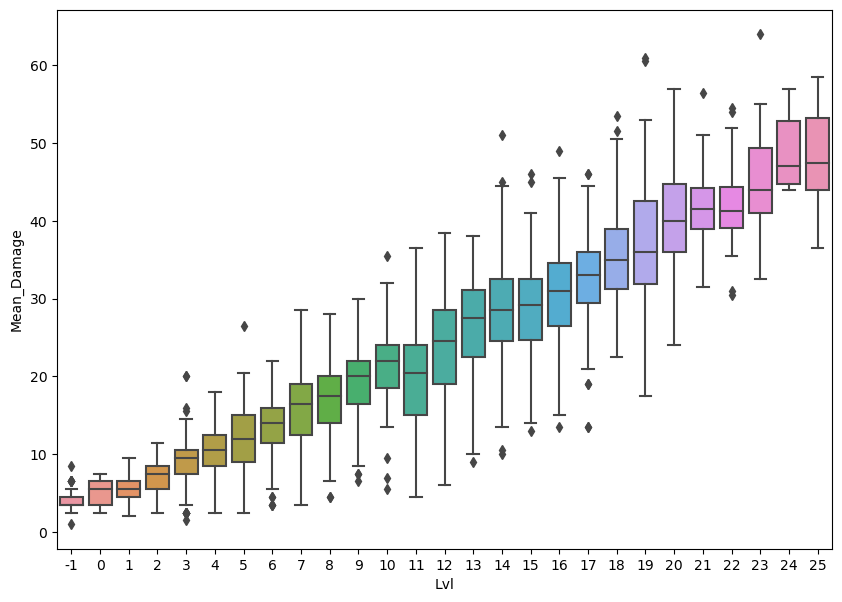

In [34]:
sns.boxplot(data = new_df, x = 'Lvl', y = 'Mean_Damage')

## Plot plots!!!

In [35]:
import hvplot.pandas  # noqa
new_df.hvplot.scatter(x = 'Hit_Bonus', y = 'Mean_Damage')

:Scatter   [Hit_Bonus]   (Mean_Damage)

<Axes: xlabel='Hit_Bonus', ylabel='Mean_Damage'>

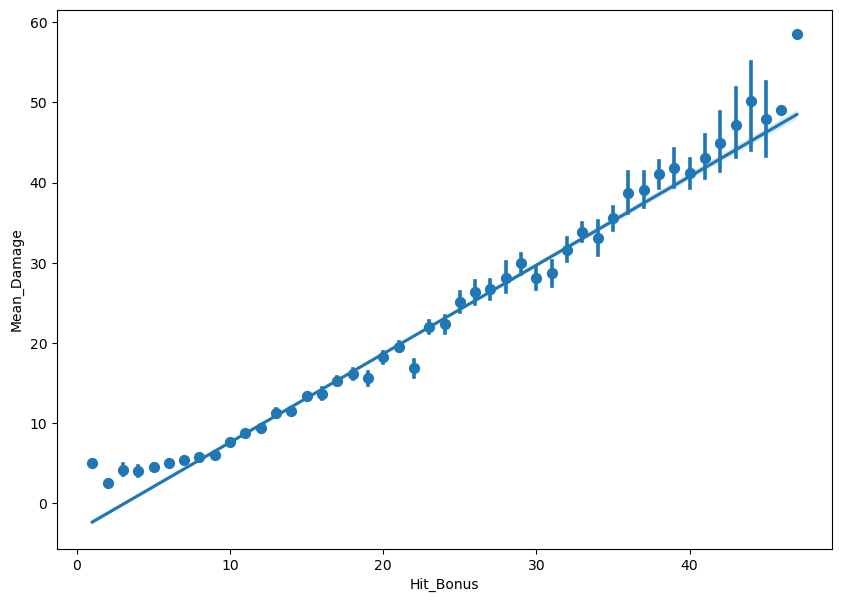

In [36]:
sns.regplot(new_df, x = 'Hit_Bonus', y = 'Mean_Damage', x_estimator=np.mean)

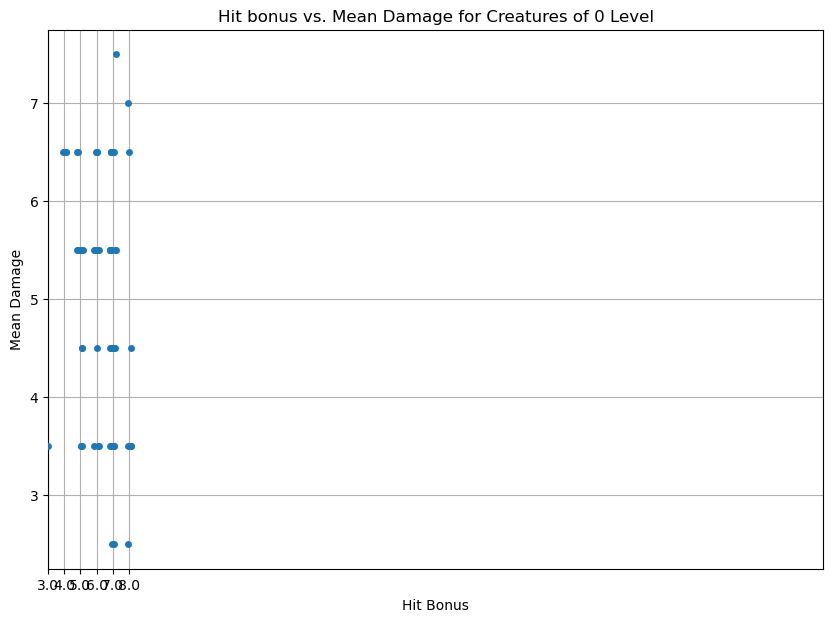

In [37]:
def plot_hit_vs_damage(lvls = [-1, 0], localized = False, attack_type = 'All'):
    # filter data
    local_df = new_df.copy()
    local_df = local_df[local_df.Lvl.between(lvls[0], lvls[1])]

    if attack_type == 'Melee':
        local_df = local_df[local_df['Attack_Type'] == 'Melee']
    elif attack_type == 'Range':
        local_df = local_df[local_df['Attack_Type'] == 'Range']

    # plot
    if attack_type in ['All', 'Melee', 'Range']:
        sns.stripplot(local_df, x = 'Hit_Bonus', y = 'Mean_Damage', jitter=0.2)
    elif attack_type == 'By Type':
        sns.stripplot(local_df, x = 'Hit_Bonus', y = 'Mean_Damage', hue = 'Attack_Type', jitter=0.2)
        
    
    plt.xlabel('Hit Bonus')
    plt.ylabel('Mean Damage')

    if lvls[0]==lvls[1]:
        plt.title(f'Hit bonus vs. Mean Damage for Creatures of {lvls[0]} Level')
    else:
        plt.title(f'Hit bonus vs. Mean Damage for Creatures of {lvls[0]} - {lvls[1]} Levels')

    if not localized:
        plt.xlim([new_df.Hit_Bonus.min()-1, new_df.Hit_Bonus.max()+1])

    plt.grid(True)

plot_hit_vs_damage([0,0])

In [38]:
_ = widgets.interact(
    plot_hit_vs_damage,
    lvls = widgets.IntRangeSlider(
        value = [-1, 0],
        min = -1,
        max = 24,
        step = 1
    ),
    localize = widgets.Checkbox(
        value = False,
        description = 'Localized'
    ),
    attack_type = widgets.ToggleButtons(
        options = ['All', 'Melee', 'Range', 'By Type']
    )
)

interactive(children=(IntRangeSlider(value=(-1, 0), description='lvls', max=24, min=-1), Checkbox(value=False,…

### Damage Histogram

In [52]:
def plot_mean_damage(lvls = [-1, 0], localized = True, attack_type = 'All'):
    # filter data
    local_df = new_df.copy()
    local_df = local_df[local_df.Lvl.between(lvls[0], lvls[1])]

    if attack_type == 'Melee':
        local_df = local_df[local_df['Attack_Type'] == 'Melee']
    elif attack_type == 'Range':
        local_df = local_df[local_df['Attack_Type'] == 'Range']

    # plot
    if attack_type in ['All', 'Melee', 'Range']:
        sns.histplot(local_df, x = 'Mean_Damage', discrete = True, color = base_type_color)
    elif attack_type == 'By Type':
        sns.histplot(local_df, x = 'Mean_Damage', discrete = True, hue = 'Attack_Type', palette=two_type_palette)
        
    
    plt.xlabel('Hit Bonus')
    plt.ylabel('Mean Damage')

    if lvls[0]==lvls[1]:
        plt.title(f'Mean Damage for Creatures of {lvls[0]} Level')
    else:
        plt.title(f'Mean Damage for Creatures of {lvls[0]} - {lvls[1]} Levels')

    if not localized:
        plt.xlim([new_df.Hit_Bonus.min()-1, new_df.Hit_Bonus.max()+1])

    plt.grid(True)

In [53]:
_ = widgets.interact(
    plot_mean_damage,
    lvls = widgets.IntRangeSlider(
        value = [-1, 0],
        min = -1,
        max = 24,
        step = 1
    ),
    localize = widgets.Checkbox(
        value = False,
        description = 'Localized'
    ),
    attack_type = widgets.ToggleButtons(
        options = ['All', 'Melee', 'Range', 'By Type']
    )
)

interactive(children=(IntRangeSlider(value=(-1, 0), description='lvls', max=24, min=-1), Checkbox(value=True, …

# Mean Damage (Chance of Strike Success * Mean Damage of Attack)

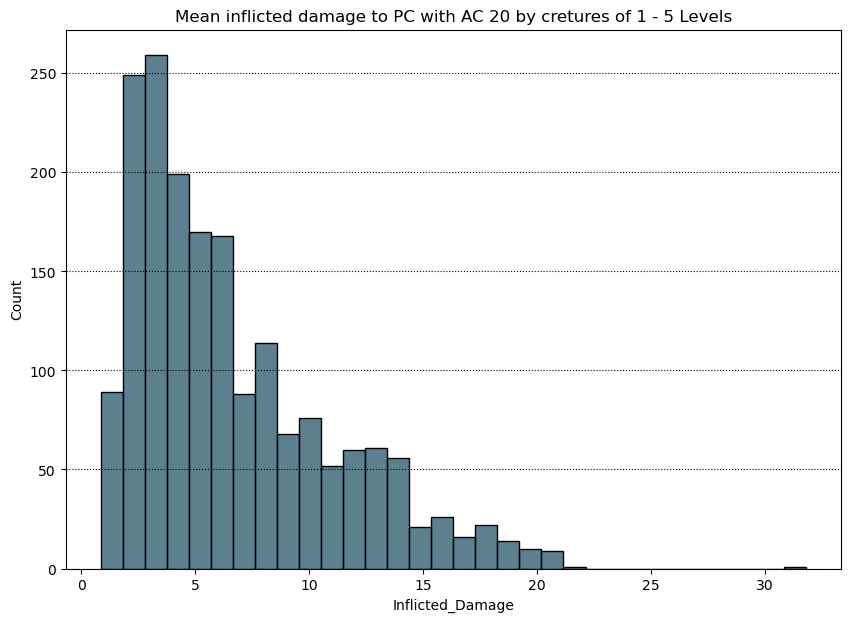

In [48]:
def plot_inflicted_damage(ac, lvls, attack_type):
    # calculate and filtrate the data
    local_df = new_df[new_df['Lvl'].between(lvls[0], lvls[1])].copy()

    if attack_type == 'Melee':
        local_df = local_df[local_df['Attack_Type'] == 'Melee']
    elif attack_type == 'Range':
        local_df = local_df[local_df['Attack_Type'] == 'Range']

    local_df[['cf_chanse', 'f_chanse', 's_chanse', 'cs_chanse']] = \
        local_df['Hit_Bonus'].apply( lambda x: pd.Series(hit_chanses(x, ac)))
    
    # mean inflicted damage P_s*Dmg + P_cs*2*Dmg
    local_df['Inflicted_Damage'] = (local_df['s_chanse'] + 2*local_df['cs_chanse']) * local_df['Mean_Damage']



    # ploting
    if attack_type in ['All', 'Melee', 'Range']:
        sns.histplot(local_df, x = 'Inflicted_Damage', color=base_type_color)
    elif attack_type == 'By Type':
        sns.histplot(local_df, x = 'Inflicted_Damage', hue = 'Attack_Type', palette=two_type_palette)


    # plt.ylabel('Mean Inflicted Damage')
    title_start = f'Mean inflicted damage to PC with AC {ac} by cretures of'
    if lvls[0] == lvls[1]:
        plt.title(title_start + f' {lvls[0]} Level')
    else:
        plt.title(title_start + f' {lvls[0]} - {lvls[1]} Levels')

    # plt.yticks(np.arange(0, 1, .05))

    plt.grid(True, axis = 'y', linestyle = ':', color = 'k')

plot_inflicted_damage(20, (1, 5), 'All')

In [49]:
_ = widgets.interact(
    plot_inflicted_damage,
    ac = widgets.IntSlider(
        min = 7,
        max = 40,
        step = 1
    ),
    lvls = widgets.IntRangeSlider(
        value = [-1, 0],
        min = -1,
        max = 24,
        step = 1
    ),
    # localize = widgets.Checkbox(
    #     value = False,
    #     description = 'Localized'
    # ),
    attack_type = widgets.ToggleButtons(
        options = ['All', 'Melee', 'Range', 'By Type']
    )
)

interactive(children=(IntSlider(value=7, description='ac', max=40, min=7), IntRangeSlider(value=(-1, 0), descr…